<a href="https://colab.research.google.com/github/KendiSookie/Autoinland/blob/main/AutoInland_Vehicle_Insurance_Claim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AutoInland Vehicle Insurance Claim Prediction**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.0) Project Overview

Insurance is a risk management method where you protect yourself against unexpected financial loss in exchange of a fee known as **premium**. An entity which provides insurance is known as an **insurer** and the person or entity who buys insurance is known as a **policy holder**. In exchange for paying a premium, the insurance company agrees to indemnify your loss as per the terms of the policy.

Vehicle insurance also known as car, motor or auto insurance is purchased for private cars, commercial vehicles, motor cycles and any other road vehicles. In many countries it is compulsory to have vehicle insurance before using or keeping a motor vehicle. The premium amounts vary and depend on various factors such as type of vehicle, age of vehicle, fuel type, vehicle category e.t.c

**AutoInland** is an Insurance company in west Africa with a focus on Auto Insurance.

# 1.2) Problem Statement

The main revenue generating activity for insurance companies is charging premiums in exchange of insurance coverage and later re - invest those premiums in other income generating assets. The main expense in insurance firms arise from claims made in certain period of time.

Like any other private business, insurance companies will want to effectively minimize and manage their expenses. An effective way of managing expenses is forecasting future expenses for planning purposes and better service delivery to clients. 

**AutoInland** would like to anticipate future claim demands to allow them  manage their resources better and at the same time give quality customer experience and satisfaction.


#1.3) Objectives
#a) Main objective
The objective of this project is to develop a predictive model that determines if a customer will submit a vehicle insurance claim in the next three months.

#b) Specific objectives

1. To create a machine learning model that will make the predictions.



2. To establish whether a client will submit a vehicle claim in the next three months.

3. To anticipate future demands in terms of claims request volume.


# 1.4)Specifying the question


1.   Will a customer submit a vehicle insurance claim in the next three months?

# 1.5) Defining the metric of success
Perform Exploratory Data Analysis on Auto-Inland insurance policies data.

Project will be considered successful if we train a machine learning model that will be able to predict whether a customer will submit a claim in the next three months and challenge our solution by fine tuning our model to get the best performance.

Achieve a F1 Score of 0.85

#1.6) Understanding the question

The dataset we have describes ~12,000 policies sold by AutoInland for car insurance. Information on the car type, make, customer age and start of policy are in the data.

Below are the various variables in our dataset;

1. **Policy Start Date** :	Date policy started
2. **Policy End Date**  :	Date policy ended
3.  **Gender** :	Gender of the customer
4. **Age**:	Age of the customer
5. **Product Name**:	Name of Insurance policy
6.	**First Transaction Date** :	First date payment was made
7.	**No_Pol** :	Number of policies the customer has
8.	**Car_Category** :	Type of car
9.  **Subject_Car_Colour** :	Car colour
10. **Subject_Car_Make** :	Car make
11.	**LGA_Name** :	City where policy was purchased
12. **State	State** : where policy was purchased
13. **No_of_claims_3_mon_period** :	Wether the customer claimed within a 3 month period


#1.7) Experimental Design Taken

1. loading the required libraries
2. Reading and previewing dataset
3. Tidying the data
4. Exploratory Data Analysis
5.  Implementing the solution 
6. Challenging the solution

# 1.8) Data Relevance
The dataset is relevant for the analysis process.This dataset provides a complete overview of **12,000** policies sold by AutoInland for car insurance by providing Information on the car type, make, customer age and start of policy from **2001-12-11 to 2010-12-31**

The dataset was extracted from Zindi

# 2) Reading the data

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading files into dataframes
train =pd.read_csv('/content/drive/MyDrive/Train.csv')
test =pd.read_csv('/content/drive/MyDrive/Test.csv')
ss = pd.read_csv('/content/drive/MyDrive/SampleSubmission.csv')



# 3) Understanding the data

In [ ]:
# Preview the first five rows of the train set
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [ ]:
# Preview the first five rows of the test set
test.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,ID_01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
1,ID_024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
2,ID_02NOVWQ,2010-08-29,2011-08-28,Female,45,2010-08-29,2,Saloon,Black,Honda,Wuse 11,Abuja,Car Classic
3,ID_02VSP68,2010-06-13,2011-06-12,Female,58,2010-06-13,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe
4,ID_02YB37K,2010-07-01,2011-06-30,NaN,120,2010-07-01,1,Saloon,Red,Hyundai,Victoria Island,Lagos,Car Classic


In [ ]:
#Checking the number of entries in train and test sets
print(f' Shape of train dataset is: {train.shape} \n Shape of test dataset is: {test.shape}')


 Shape of train dataset is: (12079, 14) 
 Shape of test dataset is: (1202, 13)


In [ ]:

# Checking our columns
print(train.columns)
print(test.columns)

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target'],
      dtype='object')
Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName'],
      dtype='object')


**Observation**

We have similar columns in both train ans test sets

In [ ]:

#Type column to be used to split train and test set from the combined dataframe
train['type'] = '0'
test['type'] = '1'

# Combine train and test set
combined_data = pd.concat((train, test)).reset_index(drop =True)
combined_data

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,type
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0.0,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1.0,0
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0.0,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0.0,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13276,ID_ZTTHC5X,2010-12-05,2011-12-04,Male,67,2010-12-05,2,JEEP,Black,TOYOTA,Victoria Island,Lagos,Car Classic,NaN,1
13277,ID_ZUJAFUP,2010-01-14,2011-01-13,Male,43,2010-01-14,1,Saloon,Silver,Hyundai,Surulere,Lagos,Car Classic,NaN,1
13278,ID_ZWHCTUM,2010-07-26,2011-07-25,Male,30,2010-07-26,1,Truck,White,Iveco,Victoria Island,Lagos,CVTP,NaN,1
13279,ID_ZWQRL8L,2010-02-16,2011-02-15,Male,44,2010-02-16,2,Saloon,NaN,Nissan,Aba North,Aba-North,Car Classic,NaN,1


In [ ]:
#check the columns data types
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      13281 non-null  object 
 1   Policy Start Date       13281 non-null  object 
 2   Policy End Date         13281 non-null  object 
 3   Gender                  12881 non-null  object 
 4   Age                     13281 non-null  int64  
 5   First Transaction Date  13281 non-null  object 
 6   No_Pol                  13281 non-null  int64  
 7   Car_Category            9171 non-null   object 
 8   Subject_Car_Colour      5622 non-null   object 
 9   Subject_Car_Make        10557 non-null  object 
 10  LGA_Name                6149 non-null   object 
 11  State                   6137 non-null   object 
 12  ProductName             13281 non-null  object 
 13  target                  12079 non-null  float64
 14  type                    13281 non-null

we'll need to change the object data type to category data type

In [ ]:
#check the number and value of unique values in each column
for column in combined_data.columns:
  print(column)
  print(combined_data[column].nunique())
  print(combined_data[column].unique())
  print('------------------------------------------------------------------')


ID
13281
['ID_0040R73' 'ID_0046BNK' 'ID_005QMC3' ... 'ID_ZWHCTUM' 'ID_ZWQRL8L'
 'ID_ZWZ92GU']
------------------------------------------------------------------
Policy Start Date
376
['2010-05-14' '2010-11-29' '2010-03-21' '2010-08-21' '2010-08-29'
 '2010-10-21' '2010-08-02' '2010-09-12' '2010-07-06' '2010-12-18'
 '2010-12-23' '2010-10-25' '2010-01-03' '2010-03-26' '2010-09-10'
 '2010-11-19' '2010-04-26' '2010-05-09' '2010-06-28' '2010-07-27'
 '2010-12-13' '2010-10-16' '2010-08-07' '2010-03-05' '2010-10-28'
 '2010-12-11' '2010-01-23' '2010-07-02' '2010-03-01' '2010-02-10'
 '2010-03-16' '2010-01-22' '2010-10-07' '2010-06-21' '2010-04-04'
 '2010-11-28' '2010-05-08' '2010-09-06' '2010-11-09' '2010-03-12'
 '2010-02-12' '2010-04-25' '2010-12-25' '2010-01-13' '2010-03-08'
 '2010-07-08' '2010-04-15' '2010-09-09' '2010-06-06' '2010-05-20'
 '2010-04-23' '2010-07-31' '2010-07-04' '2010-08-15' '2010-02-18'
 '2010-09-17' '2010-07-26' '2010-09-20' '2010-10-09' '2010-11-26'
 '2010-01-17' '2010-05-13

Age and gender has anomalies

In [ ]:
#checkinf for duplicate rows
sum(combined_data.duplicated())

0

In [ ]:
# Identifying the missing data
#
#sum of missing values in every column
combined_data.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     400
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              4110
Subject_Car_Colour        7659
Subject_Car_Make          2724
LGA_Name                  7132
State                     7144
ProductName                  0
target                    1202
type                         0
dtype: int64

In [ ]:
#descibe the dataframe
combined_data.describe()

,Age,No_Pol,target
count,13281.000000,13281.000000,12079.000000
mean,42.375574,1.302763,0.120457
std,93.170951,0.723195,0.325509
min,-6099.000000,1.000000,0.000000
25%,35.000000,1.000000,0.000000
50%,41.000000,1.000000,0.000000
75%,50.000000,1.000000,0.000000
max,320.000000,10.000000,1.000000


the min and max values of age reflect that there are anomalies

# 4) Tidying the Dataset


In [ ]:
# Change each column to its appriopriate datatype
date_cols = [col for col in combined_data.columns if 'Date' in col]
num_cols = ['Age', 'No_Pol']
cat_cols = [col for col in combined_data.columns if col not in date_cols+num_cols+['ID', 'target']]

for col in combined_data.columns:
  if col in date_cols:
    combined_data[col] = pd.to_datetime(combined_data[col])
  elif col in cat_cols:
    combined_data[col] = combined_data[col].astype('category')

# Confirm whether the changes have been applied successfully
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      13281 non-null  object        
 1   Policy Start Date       13281 non-null  datetime64[ns]
 2   Policy End Date         13281 non-null  datetime64[ns]
 3   Gender                  12881 non-null  category      
 4   Age                     13281 non-null  int64         
 5   First Transaction Date  13281 non-null  datetime64[ns]
 6   No_Pol                  13281 non-null  int64         
 7   Car_Category            9171 non-null   category      
 8   Subject_Car_Colour      5622 non-null   category      
 9   Subject_Car_Make        10557 non-null  category      
 10  LGA_Name                6149 non-null   category      
 11  State                   6137 non-null   category      
 12  ProductName             13281 non-null  catego

In [ ]:
# Map gender entries that are neither female or male to others
mapper = {'Entity':'Other', 'Joint Gender':'Other', 'NOT STATED':'Other', 'NO GENDER': 'Other', 'SEX':"Other"}
combined_data.Gender = combined_data.Gender.replace(mapper)

# Confirm mappings
combined_data.Gender.value_counts()

Male      8356
Female    3679
Other      846
Name: Gender, dtype: int64

In [ ]:
#Fill the null value in gender column with Others
combined_data.Gender.fillna('Other', inplace =True)
combined_data.Gender.isnull().sum()

0

In [ ]:
# Fill in missing values
# For cat cols and date cols fill in with mode
for col in combined_data.columns:
  if col in cat_cols:
   combined_data[col] = combined_data[col].fillna(combined_data[col].mode()[0])
 

# Confirm that there aren't any missing values
combined_data[combined_data.columns.difference(['target'])].isna().sum()

Age                       0
Car_Category              0
First Transaction Date    0
Gender                    0
ID                        0
LGA_Name                  0
No_Pol                    0
Policy End Date           0
Policy Start Date         0
ProductName               0
State                     0
Subject_Car_Colour        0
Subject_Car_Make          0
type                      0
dtype: int64

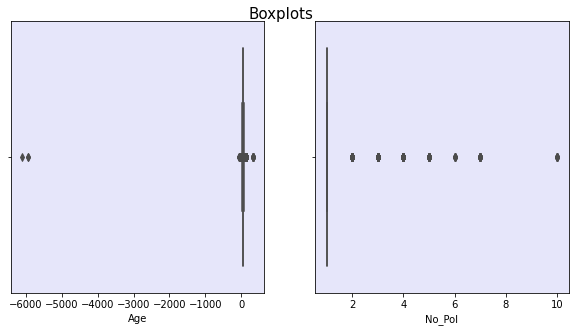

In [ ]:
col_list = ['Age', 'No_Pol']
       
colors = ['limegreen', 'gold']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'black')
for ax, data, column, color in zip(axes.flatten(), train, col_list, colors):
  sns.boxplot(combined_data[column], ax = ax, color = color)
  ax.set_facecolor('lavender')


In [ ]:
#delete the outliers (accounted to 12% of the data)
column_to_delete = combined_data[ (combined_data['Age']<18)].index
column_to_delete2 = combined_data[ (combined_data['Age']>150)].index

combined_data.drop(column_to_delete, inplace =True)

#confirm rows have been deleted
combined_data.shape



(12675, 15)

In [ ]:
combined_data.drop(column_to_delete2, inplace = True)

#confirm rows have been deleted
combined_data.shape

(12663, 15)

In [ ]:
print(combined_data['Policy Start Date']. min())
print(combined_data['Policy Start Date']. max())

2001-12-11 00:00:00
2010-12-31 00:00:00


In [ ]:
# Extract policy duration from the date columns
combined_data['Policy_Duration'] = combined_data['Policy End Date'] - combined_data['Policy Start Date']
combined_data['Policy_Duration'] = combined_data['Policy_Duration'].astype(int)


In [ ]:
# Extract date features from the date columns
for col in date_cols:
  for date_feature in ['year', 'month', 'day']:
    combined_data[col+date_feature] = getattr(combined_data[col].dt, date_feature)

combined_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,...,Policy_Duration,Policy Start Dateyear,Policy Start Datemonth,Policy Start Dateday,Policy End Dateyear,Policy End Datemonth,Policy End Dateday,First Transaction Dateyear,First Transaction Datemonth,First Transaction Dateday
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,...,31449600000000000,2010,5,14,2011,5,13,2010,5,14
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,...,31449600000000000,2010,11,29,2011,11,28,2010,11,29
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,...,31449600000000000,2010,3,21,2011,3,20,2010,3,21
4,ID_00BRP63,2010-08-29,2010-12-31,Other,20,2010-08-29,3,Saloon,Black,TOYOTA,...,10713600000000000,2010,8,29,2010,12,31,2010,8,29
5,ID_00D3EF6,2010-10-21,2011-10-20,Male,37,2010-10-21,2,Saloon,Black,TOYOTA,...,31449600000000000,2010,10,21,2011,10,20,2010,10,21


In [ ]:
#remove date columns and ID
#
combined_data.drop(['Policy Start Date', 'Policy End Date', 'First Transaction Date','ID'], axis = 1,  inplace = True)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12663 entries, 0 to 13280
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Gender                       12663 non-null  category
 1   Age                          12663 non-null  int64   
 2   No_Pol                       12663 non-null  int64   
 3   Car_Category                 12663 non-null  category
 4   Subject_Car_Colour           12663 non-null  category
 5   Subject_Car_Make             12663 non-null  category
 6   LGA_Name                     12663 non-null  category
 7   State                        12663 non-null  category
 8   ProductName                  12663 non-null  category
 9   target                       11511 non-null  float64 
 10  type                         12663 non-null  category
 11  Policy_Duration              12663 non-null  int64   
 12  Policy Start Dateyear        12663 non-null  int64   
 13  P

# 5) Exploratory Data Analysis




> # a) Univariate Analysis

In [ ]:
# Understanding the target distribution
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs = [[{'type' : 'xy'}, {'type' : 'domain'}]], subplot_titles = ['Bar Chart', 'Pie Chart'])

fig.add_trace(
    go.Bar(x= combined_data['target'].value_counts().index,
           y= combined_data['target'].value_counts().values),
 
    row=1, col=1
)
fig.add_trace(go.Pie(labels = combined_data['target'].value_counts().index,
                     values = combined_data['target'].value_counts().values),
              
              
    row=1, col=2
    
)
fig.update_layout({ 'title' : { 'text' : 'Target Distribution',
                               'x' : 0.5, 'y' : 0.9,
                               'font_size' : 25, 'font_color' : 'Crimson'}},
                  showlegend = False)
fig.update_xaxes(title_text = 'Outcome', color = 'Crimson')
fig.update_yaxes(title_text = 'Yes/No', color = 'Crimson')
marker = dict (color = 'LightSeaGreen')
fig.show()

**Observation**



* Our target variable which is target has two categories, 0 and 1

* 0 stands for - no claim made and 1 stands for a claim made

* Out of the 13,276 observations, 87.8% observations represent clients rhat did not make any claim and only 12.2% made claims

* We can also see the classes are heavily imbalanced

In [ ]:
# getting summary statisctics for both categorical and numerical columns
combined_data.describe(include = 'all')

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,...,Policy_Duration,Policy Start Dateyear,Policy Start Datemonth,Policy Start Dateday,Policy End Dateyear,Policy End Datemonth,Policy End Dateday,First Transaction Dateyear,First Transaction Datemonth,First Transaction Dateday
count,12663,12663.000000,12663.000000,12663,12663,12663,12663,12663,12663,11511.000000,...,1.266300e+04,12663.000000,12663.000000,12663.000000,12663.000000,12663.000000,12663.000000,12663.000000,12663.000000,12663.000000
unique,3,NaN,NaN,16,46,68,268,113,9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Male,NaN,NaN,Saloon,Black,TOYOTA,Victoria Island,Lagos,Car Classic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8025,NaN,NaN,10229,9216,7832,7980,10110,6939,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,45.377794,1.297797,NaN,NaN,NaN,NaN,NaN,NaN,0.121536,...,3.016318e+16,2009.995815,6.396273,16.133144,2010.995578,5.881071,15.995025,2009.995815,6.396273,16.133144
std,NaN,17.857464,0.722192,NaN,NaN,NaN,NaN,NaN,NaN,0.326763,...,1.816195e+16,0.157671,3.503924,8.883473,0.505362,3.508332,8.973947,0.157671,3.503924,8.883473
min,NaN,18.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,1.036800e+15,2001.000000,1.000000,1.000000,2010.000000,1.000000,1.000000,2001.000000,1.000000,1.000000
25%,NaN,36.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,3.144960e+16,2010.000000,3.000000,8.000000,2011.000000,3.000000,8.000000,2010.000000,3.000000,8.000000
50%,NaN,41.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,3.144960e+16,2010.000000,7.000000,16.000000,2011.000000,5.000000,16.000000,2010.000000,7.000000,16.000000
75%,NaN,50.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,3.144960e+16,2010.000000,10.000000,24.000000,2011.000000,9.000000,24.000000,2010.000000,10.000000,24.000000


   >> # b) Bivariate Analysis

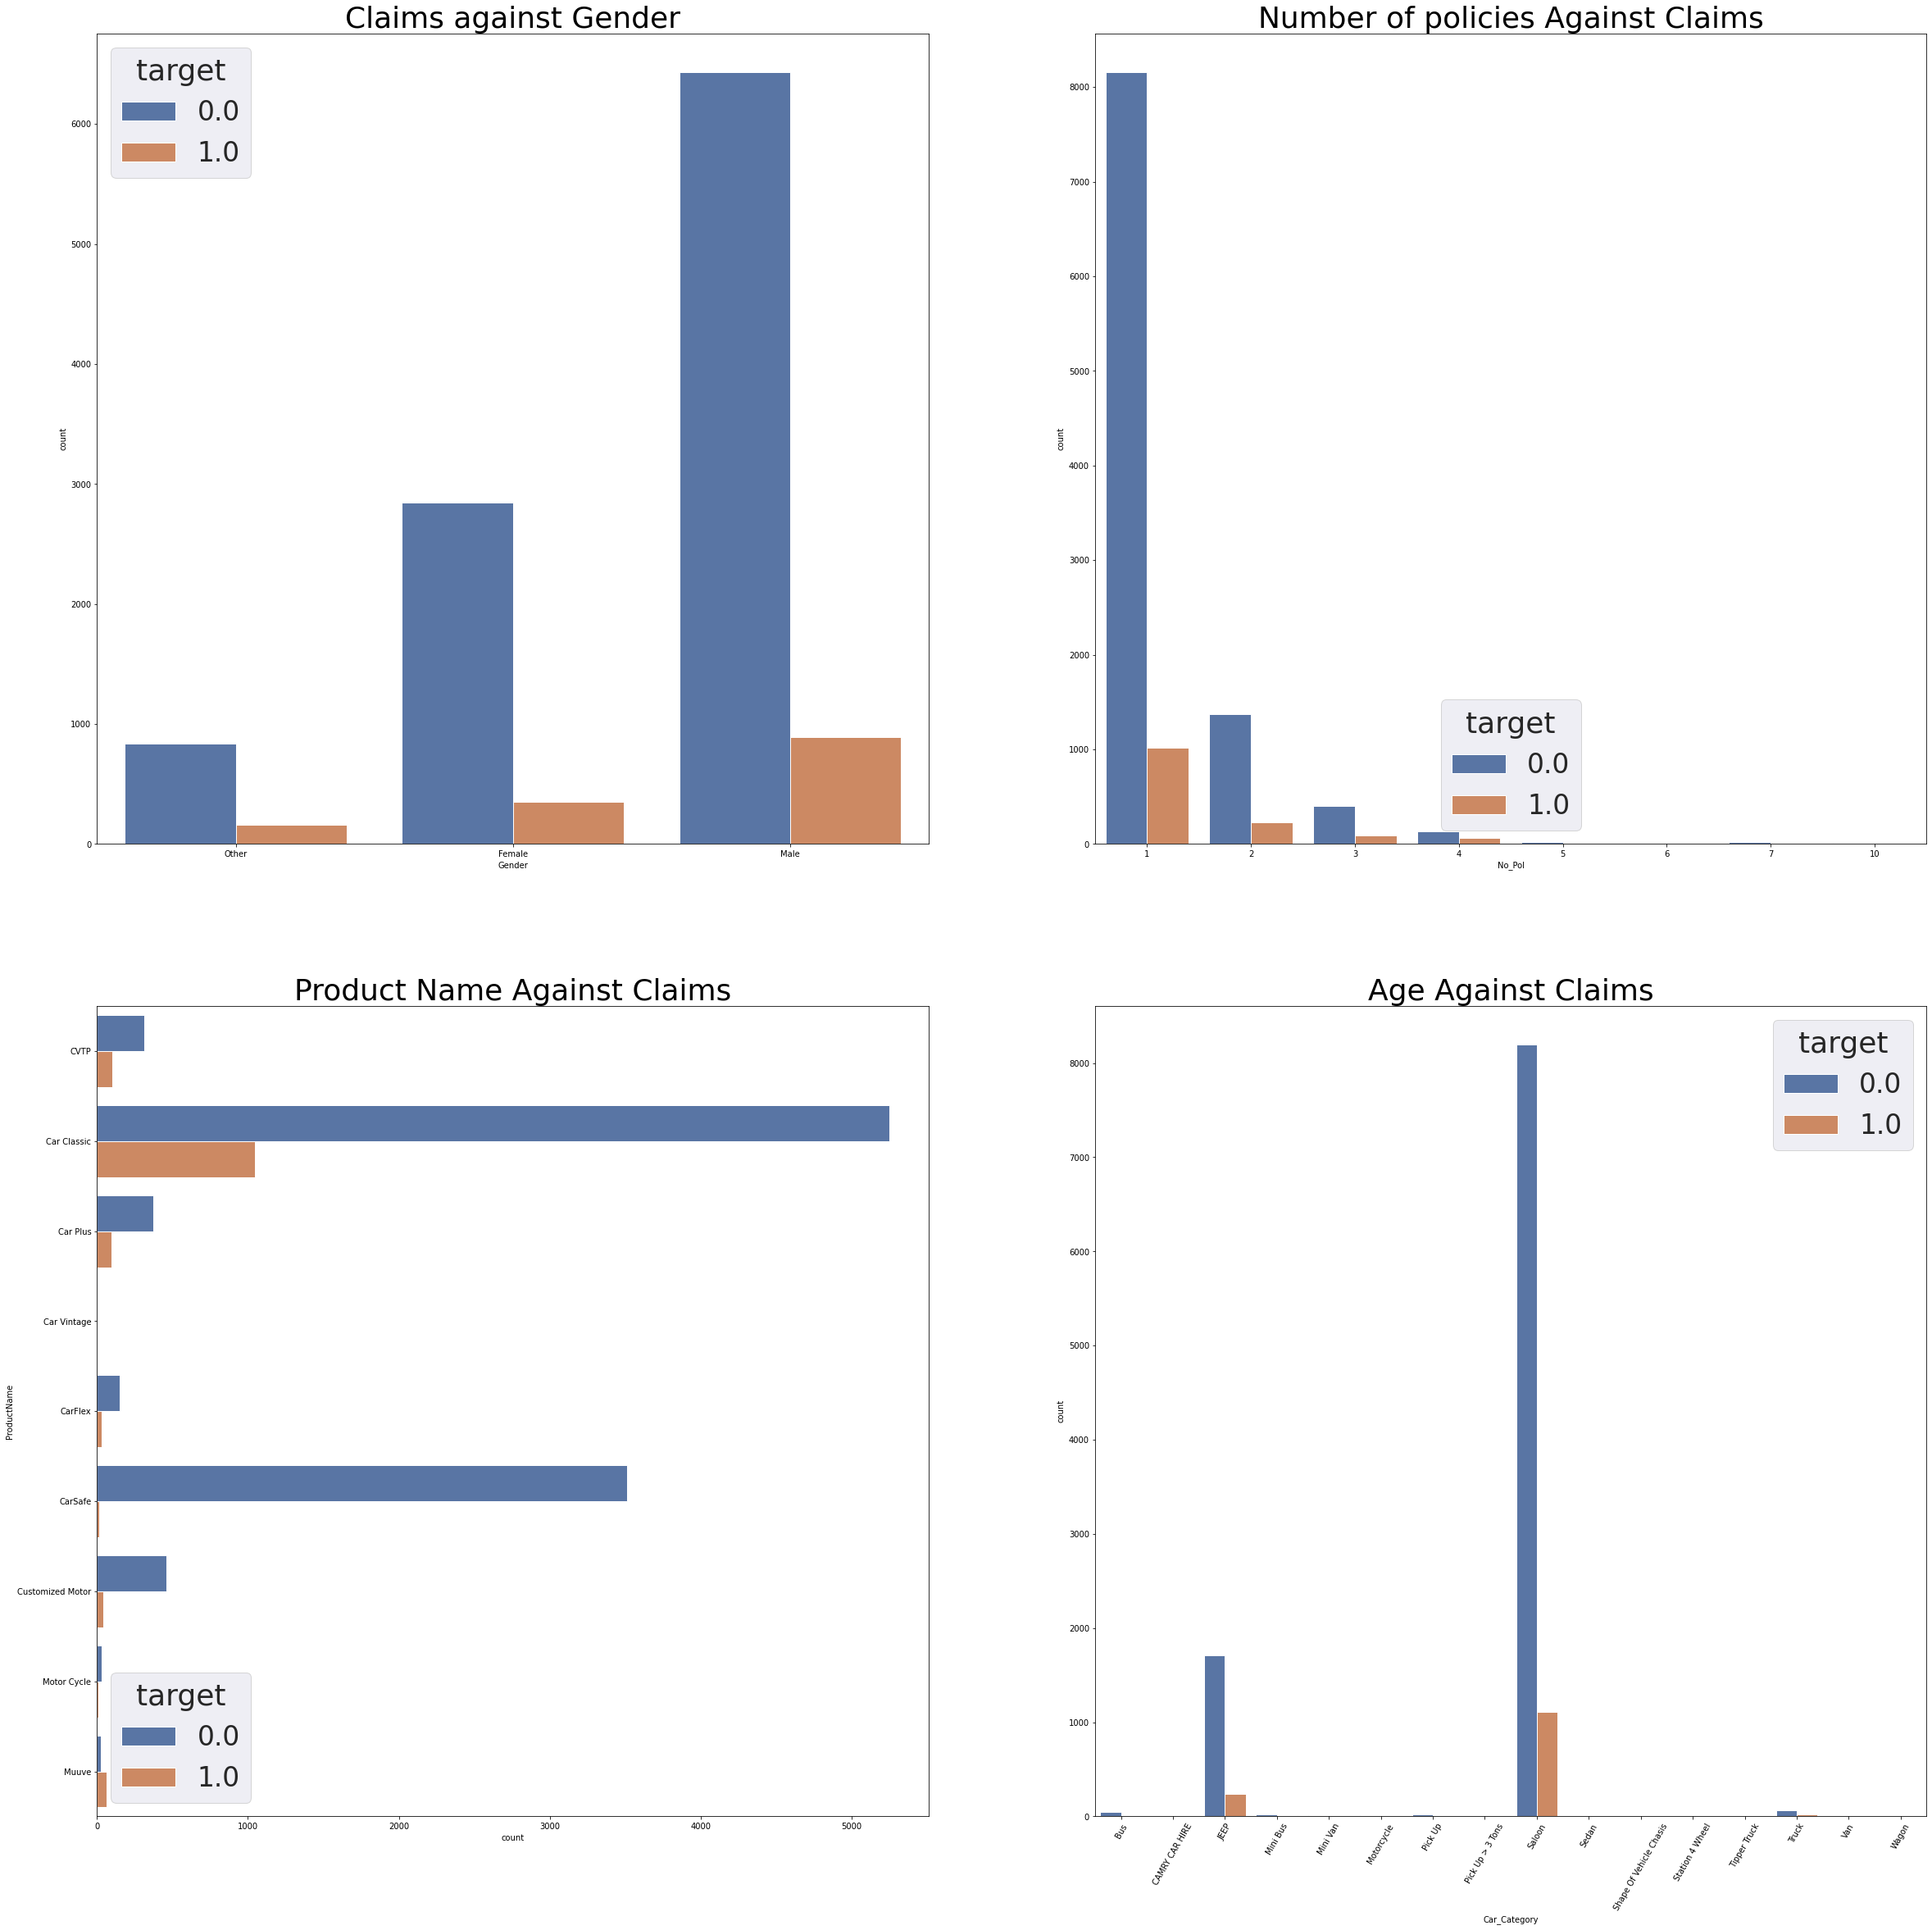

In [ ]:
# comparing Gender, No of policies, product name and car category
# with total claims made

fig, axis = plt.subplots(2, 2, figsize =(40, 40))
sns.set(font_scale=3)
# plot 1
sns.countplot(data=combined_data, x="Gender", hue="target", ax= axis [0,0]).set(title='Claims against Gender');

# # # Plot 2
            
sns.countplot( x = 'No_Pol', data = combined_data, hue="target", ax = axis[0,1]).set(title='Number of policies Against Claims');


# # # Plot 3
sns.countplot( y = 'ProductName', data = combined_data, hue="target", ax = axis[1,0]).set(title='Product Name Against Claims');

# # # Plot 4
sns.countplot(data = combined_data, x="Car_Category", hue="target", ax= axis [1,1]).set(title='Age Against Claims');
plt.xticks(rotation=60);
plt.show()


**Observation**
1. **Gender** - We have three categories, Male, Female and Other. The male category leads in the total claims made, followed by female and 'other' category has the least.

2. **No_Pol** - Clients with only one policy lead in the total claims made and the claims reduce as the number of policies held by clients increases

3. **Product Name** - Car clasic leads in the most claims made followed by Car plus Muuve, and customized  motor.

4. **Car Ctegory** - Saloon car makes the most claims followed by jeep and lastly trucks

<Figure size 1008x3024 with 0 Axes>

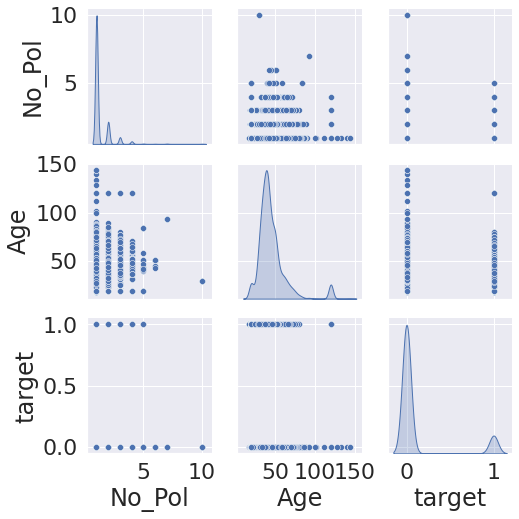

In [ ]:
plt.figure(figsize=(14, 42));
sns.set(font_scale=2);
sns.pairplot(combined_data[['No_Pol','Age','target','Car_Category']], diag_kind='kde');

**Observation**


*   The data is non - linear and it is not normally distributed as it is skewed to the right

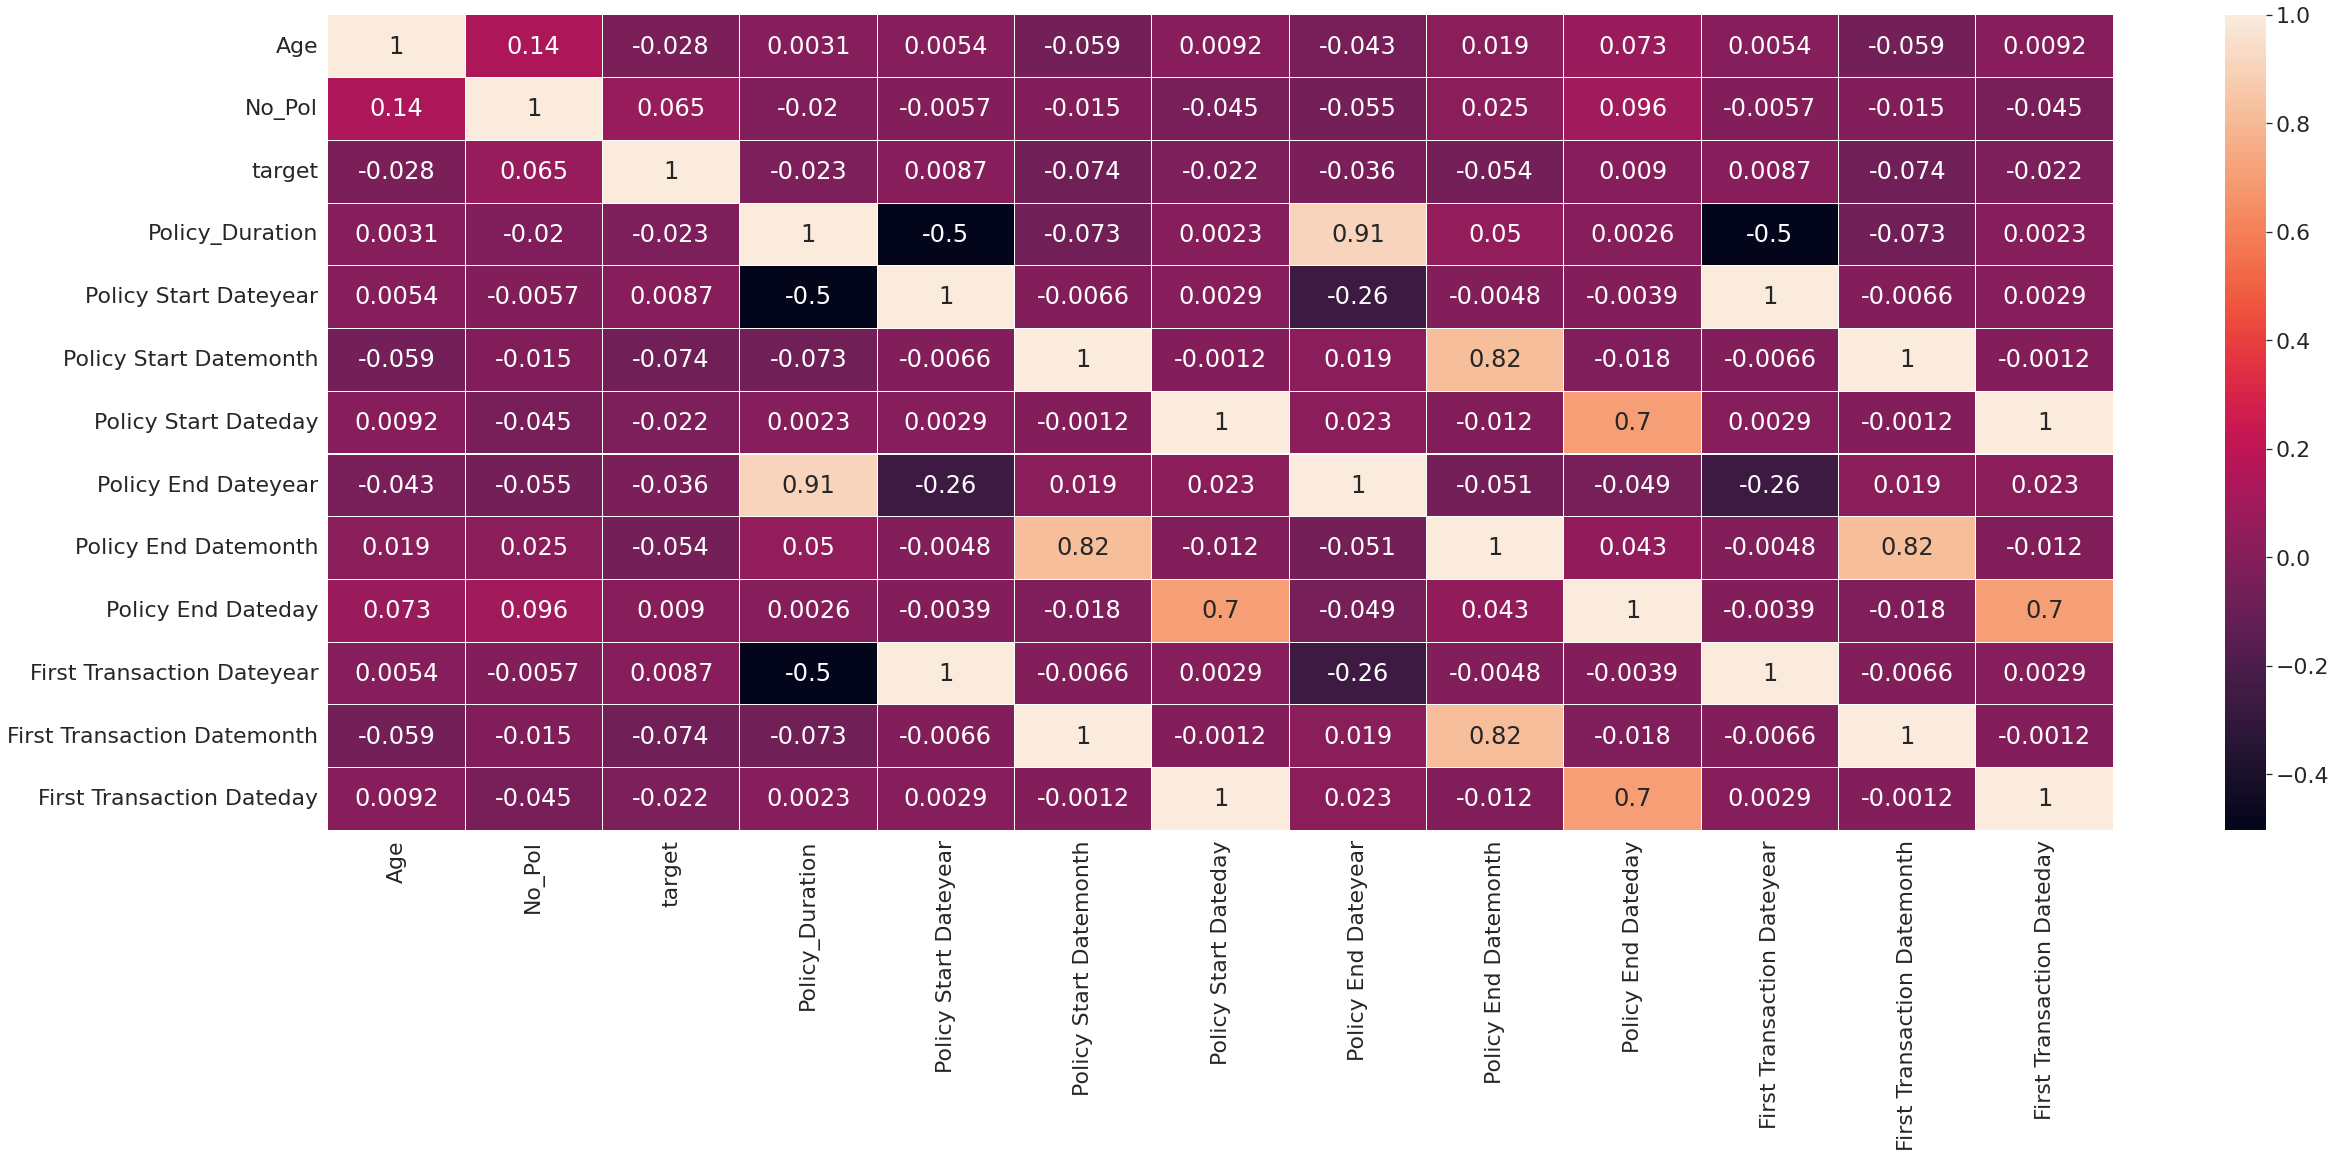

In [ ]:
# Create a correlation matrix to relationship of the variables
corrMatrix = combined_data.corr()
corrMatrix

# Vizualise the correlation matrix using a heat map

fig, ax = plt.subplots(figsize=(40,15)) 
sns.heatmap(corrMatrix, annot=True,  linewidths=.1, ax=ax)

# 6) Implementing the Solution

## Data Pre -processing

In [ ]:

# Convert catergorical data to Numerical for modeling
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
for col in cat_cols:
  combined_data[col] =en.fit_transform(combined_data[col])


combined_data.head()

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,...,Policy_Duration,Policy Start Dateyear,Policy Start Datemonth,Policy Start Dateday,Policy End Dateyear,Policy End Datemonth,Policy End Dateday,First Transaction Dateyear,First Transaction Datemonth,First Transaction Dateday
0,1,30,1,8,4,61,256,74,1,0.0,...,31449600000000000,2010,5,14,2011,5,13,2010,5,14
1,0,79,1,2,26,61,256,74,1,1.0,...,31449600000000000,2010,11,29,2011,11,28,2010,11,29
2,1,43,1,8,32,61,256,74,1,0.0,...,31449600000000000,2010,3,21,2011,3,20,2010,3,21
4,2,20,3,8,4,61,163,74,8,1.0,...,10713600000000000,2010,8,29,2010,12,31,2010,8,29
5,1,37,2,8,4,61,256,74,1,0.0,...,31449600000000000,2010,10,21,2011,10,20,2010,10,21


In [ ]:
# Separate train and test data from the combined dataframe
train_df = combined_data[combined_data['type'] == 0]
test_df = combined_data[combined_data['type'] == 1]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((11511, 21), (1152, 21))

In [ ]:
#drop type column  from train as it doesnt have any use now
train_df.drop(['type'], axis = 1, inplace = True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11511 entries, 0 to 12078
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       11511 non-null  int64  
 1   Age                          11511 non-null  int64  
 2   No_Pol                       11511 non-null  int64  
 3   Car_Category                 11511 non-null  int64  
 4   Subject_Car_Colour           11511 non-null  int64  
 5   Subject_Car_Make             11511 non-null  int64  
 6   LGA_Name                     11511 non-null  int64  
 7   State                        11511 non-null  int64  
 8   ProductName                  11511 non-null  int64  
 9   target                       11511 non-null  float64
 10  Policy_Duration              11511 non-null  int64  
 11  Policy Start Dateyear        11511 non-null  int64  
 12  Policy Start Datemonth       11511 non-null  int64  
 13  Policy Start Dat

In [ ]:
#drop target and type column from test
test_df.drop(['target', 'type'], axis = 1, inplace= True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 12079 to 13280
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Gender                       1152 non-null   int64
 1   Age                          1152 non-null   int64
 2   No_Pol                       1152 non-null   int64
 3   Car_Category                 1152 non-null   int64
 4   Subject_Car_Colour           1152 non-null   int64
 5   Subject_Car_Make             1152 non-null   int64
 6   LGA_Name                     1152 non-null   int64
 7   State                        1152 non-null   int64
 8   ProductName                  1152 non-null   int64
 9   Policy_Duration              1152 non-null   int64
 10  Policy Start Dateyear        1152 non-null   int64
 11  Policy Start Datemonth       1152 non-null   int64
 12  Policy Start Dateday         1152 non-null   int64
 13  Policy End Dateyear          1152 non-null 

In [ ]:
#check the correlation of variable in the train dataset
#correlation=train_df.corr()
#correlation

In [ ]:
# use this correlations above to compute VIF(Variance Inflation Factor)
# create a new data frame with the inverse of the matrix above

#Compute the variation inflation factor
#vif = pd.DataFrame(np.linalg.inv(correlation.values), index  = correlation.index, columns = correlation.columns)
#vif

In [ ]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#X=train_df.drop(["Policy End Datemonth"], axis=1)
#vif = pd.DataFrame()
#vif["features"] = X.columns
#vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#print(vif)

In [ ]:
#X=train_df.drop(["Policy Start Datemonth","First Transaction Dateday", "First Transaction Dateyear", "Policy Start Dateyear", "Policy End Dateyear" ], axis=1)
#vif = pd.DataFrame()
#vif["features"] = X.columns
#vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#print(vif)

In [ ]:
#vif = pd.DataFrame(np.linalg.inv(correlation.values), index  = correlation.index, columns = correlation.columns)
#vif

In [ ]:
# Select main columns to be used in training

main_cols = train_df.columns.difference([ "target"])
X = train_df[main_cols]
y = train_df.target


In [ ]:
# Subject our features to LDA model
# Linear Discreminant Analysis

# Separating our target label from the other features
feat= train_df.drop(['target'], 1)
target = train_df['target']

feat
# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()

lda_= lda.fit(feat, target)
lda_feat = lda_.transform(feat)

# Display the coeficients of the reduced columns
lda_.coef_

array([[ 2.54428909e-01, -7.62288402e-03,  2.40109206e-01,
         4.68218819e-02,  2.62670083e-02, -9.11278679e-05,
        -5.45602853e-04,  1.11782372e-04, -2.67299906e-01,
         1.51657019e-15,  2.39499819e+01,  1.92813923e+00,
         5.61975600e-02, -4.80387576e+01, -3.90769378e+00,
        -1.16872454e-01,  2.39499819e+01,  1.92813923e+00,
         5.61975600e-02]])

In [ ]:
#resampling the labelled data
#---
#
from imblearn.over_sampling import SMOTE

X_resample, y_resample  = SMOTE().fit_resample(X, y.values.ravel())

print(X_resample.shape)
print(y_resample.shape)


(20224, 19)
(20224,)


In [ ]:
# checking the value counts before and after sampling

print("Before Upsampling:")
print(y.value_counts())

print("Upsampled value counts :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Upsampling:
0.0    10112
1.0     1399
Name: target, dtype: int64
Upsampled value counts :
0.0    10112
1.0    10112
Name: 0, dtype: int64


## c) Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_resample, y_resample, test_size = 0.3, random_state = 101)

# lets print the shapes again 
print("Shape of the x Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", X_valid.shape)
print("Shape of the y Valid :", y_valid.shape)




Shape of the x Train : (14156, 19)
Shape of the y Train : (14156, 1)
Shape of the x Valid : (6068, 19)
Shape of the y Valid : (6068, 1)


## d) Modelling

In [ ]:
#modeling using Xgboost
from sklearn import model_selection
from xgboost import XGBClassifier

clf = XGBClassifier()


# setting up k-fold cross validation
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits= 3, random_state= 2, shuffle = True)

# Train model
model= clf.fit(X_train, y_train)

# make predictions
# Make predictions
y_pred1 = clf.predict(X_valid)
print(f'F1 score on the X_test is: {f1_score(y_valid, y_pred1)}')


#Evaluating our algorithm
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_valid, y_pred1))

print(classification_report(y_valid, y_pred1))


results = model_selection.cross_val_score(clf, X, y, cv = kfold)
print(results.mean())

F1 score on the X_test is: 0.8581524482584553
[[2675  392]
 [ 451 2550]]
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      3067
         1.0       0.87      0.85      0.86      3001

    accuracy                           0.86      6068
   macro avg       0.86      0.86      0.86      6068
weighted avg       0.86      0.86      0.86      6068

0.8823733819824516


In [ ]:
 #Reviewing the Solution using XGBoost
from sklearn import model_selection
from xgboost import XGBClassifier
clf1 = XGBClassifier()

# Creating our model
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits= 10, random_state= seed, shuffle = True)

model2 = XGBClassifier(n_estimators= num_trees, random_state = seed, objective = {'binary : logistic'})

# Train model
model2 = clf1.fit(X_train, y_train)

# make predictions
y_prediction2 = model2.predict(X_valid)

print(f'F1 score on the X_test is: {f1_score(y_valid, y_prediction2)}')

#Evaluating our algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_valid, y_prediction2))
print(classification_report(y_valid, y_prediction2))
results = model_selection.cross_val_score(model2, X, y, cv = kfold)
print(results.mean())

F1 score on the X_test is: 0.8581524482584553
[[2675  392]
 [ 451 2550]]
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      3067
         1.0       0.87      0.85      0.86      3001

    accuracy                           0.86      6068
   macro avg       0.86      0.86      0.86      6068
weighted avg       0.86      0.86      0.86      6068

0.8831557250941211


# Challenging the Model

In [ ]:
#create a model using lgbm
model = LGBMClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_valid)
print(f'F1 score on the X_test is: {f1_score(y_valid, y_pred)}')

F1 score on the X_test is: 0.8829226847918435


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_valid, y_pred))

print(classification_report(y_valid, y_pred))



[[2781  286]
 [ 403 2598]]
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      3067
         1.0       0.90      0.87      0.88      3001

    accuracy                           0.89      6068
   macro avg       0.89      0.89      0.89      6068
weighted avg       0.89      0.89      0.89      6068



## e) Making predictions

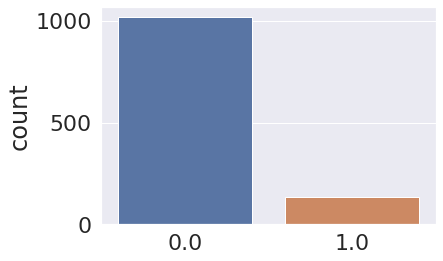

In [ ]:
# Make prediction on the test set
test_df = test_df[main_cols]
predictions = model.predict(test_df)

# Create a submission file
sub_file = ss.copy()
sub_file.predictions = predictions

# Check the distribution of your predictions
sns.countplot(sub_file.predictions);


In [ ]:
# Create a csv file and upload to zindi 
sub_file.to_csv('Baseline.csv', index = False)

# 8)Conclusion and recommendations

# Conclusion
* Number of policies- Clients with only one policy lead in the total claims made and the claims reduce as the number of policies held by clients increases

* Product Name - Car clasic leads in the most claims made followed by Car plus Muuve, and customized motor.

*  Car Category - Saloon car makes the most claims followed by jeep and lastly trucks

# Recommendation
Management should find and inititate contact with Saloon car manufacturers so they can get better deals . This will reduce cost that Autoinland will have to incure to acquire the vehicles claimed.

# What we would have done better
* More variabe generation from existing columns eg group age say age between 
18-30,  31-65 and Over 65
* Feature selection in accordance to feature importance
* More hyper paremeter tunning to improve the accuracy of our model
